In [ ]:
!pip install yfinance
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 4.9 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ta-Lib 金融數據指標的套件

Colab 安裝流程：


1. 執行階段 - 變更執行階段類型 - 軟體加速器，選擇GPU (使用GPU較快，也可不使用)

2. 執行下行程式，即可進行安裝

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2022-04-01 01:20:40--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-04-01 01:20:40--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-04-01 01:20:40--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [ ]:
#資料分析及處理
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #圖表繪製套件
import datetime #時間處理套件
import talib
import mplfinance as mpf

#網路爬蟲
import pandas_datareader.data as web
import yfinance as yf  #特別針對Yahoo Finance的套件

#數據歸一化（共有四種方法）
from sklearn.preprocessing import MinMaxScaler  #最大值及最小值標準化
'''
from sklearn.preprocessing import StandardScaler  #平均值及標準差標準化
from sklearn.preprocessing import MaxAbsScaler  #絕對值最大標準化
from sklearn.preprocessing import RobustScaler  #中位數及四分位數標準化
'''

'\nfrom sklearn.preprocessing import StandardScaler  #平均值及標準差標準化\nfrom sklearn.preprocessing import MaxAbsScaler  #絕對值最大標準化\nfrom sklearn.preprocessing import RobustScaler  #中位數及四分位數標準化\n'

In [ ]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping


#模型評價與資訊
from math import sqrt
from keras.utils.vis_utils import plot_model   # plot_model 用於繪製模型的架構圖
from  sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# 股市資料爬蟲

＊ 確定已安裝yfinance套件 [https://pypi.org/project/yfinance/ ] 

```
!pip install yfnance
```

＊ 至Yahoo Finance 確認股票代號 [https://finance.yahoo.com/ ] 


In [ ]:
start = datetime.datetime(2018,4,1) #設定起始時間
end = datetime.datetime(2021,7,30) #設定結束時間
df = yf.download('0050.TW', start, end) 
#df  = yf.download('0050.TW', start = '2018-04-01', end = '2021-07-30') 
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,82.849998,82.949997,82.150002,82.250000,82.250000,3737299
2018-04-03,81.500000,81.550003,81.199997,81.500000,81.500000,6187523
2018-04-09,82.150002,82.300003,81.599998,82.199997,82.199997,3401430
2018-04-10,82.099998,82.849998,81.750000,82.500000,82.500000,3860497
2018-04-11,82.900002,83.099998,82.750000,82.849998,82.849998,2603653
...,...,...,...,...,...,...
2021-07-23,138.050003,138.300003,137.350006,137.649994,137.649994,3093560
2021-07-26,137.750000,138.050003,136.250000,136.449997,136.449997,11587727
2021-07-27,136.500000,137.050003,136.050003,136.399994,136.399994,10316297


In [ ]:
df2 = yf.download('0050.TW',period='60d',interval='1d') #指定資料搜集到 60天 ，頻率為一天
df2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-28,144.300003,145.300003,144.300003,145.300003,145.300003,22455995
2021-12-29,145.449997,146.149994,145.050003,145.949997,145.949997,22522224
2021-12-30,145.949997,146.000000,145.350006,145.500000,145.500000,6246428
2022-01-03,146.000000,147.350006,146.000000,146.399994,146.399994,6784202
2022-01-04,147.699997,149.600006,147.699997,149.600006,149.600006,9634440
2022-01-05,150.100006,150.550003,149.100006,149.300003,149.300003,11406601
2022-01-06,148.300003,148.750000,147.000000,147.899994,147.899994,8621233
2022-01-07,148.300003,149.000000,146.500000,146.600006,146.600006,6989124
2022-01-10,146.000000,147.800003,145.399994,147.550003,147.550003,15701971


In [ ]:
df3 = yf.download('0050.TW',period='1mo',interval='1d') #指定資料搜集到 一月前(1mo) ，頻率為一天
df3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-01,139.050003,140.800003,138.850006,140.449997,140.449997,8239515
2022-03-02,140.000000,140.100006,139.199997,139.649994,139.649994,6131154
2022-03-03,140.500000,140.800003,139.850006,139.949997,139.949997,4438868
2022-03-04,138.500000,138.850006,137.949997,138.449997,138.449997,12599177
2022-03-07,136.899994,136.899994,133.750000,134.000000,134.000000,52044419
2022-03-08,132.449997,133.149994,131.000000,131.149994,131.149994,41820858
2022-03-09,132.199997,133.250000,132.199997,132.500000,132.500000,20881585
2022-03-10,135.199997,136.550003,135.199997,136.350006,136.350006,14436523
2022-03-11,135.850006,135.850006,134.199997,134.399994,134.399994,10604845


In [ ]:
df4 = yf.download('0050.TW',period='3d',interval='1m') #指定資料搜集到 三天前(3d) ，頻率為一分鐘
df4

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-03-30 09:00:00+08:00,138.050003,138.300003,138.050003,138.199997,138.199997,0
2022-03-30 09:01:00+08:00,138.300003,138.350006,138.199997,138.250000,138.250000,138000
2022-03-30 09:02:00+08:00,138.199997,138.250000,138.149994,138.199997,138.199997,89000
2022-03-30 09:03:00+08:00,138.250000,138.350006,138.199997,138.350006,138.350006,169000
2022-03-30 09:04:00+08:00,138.300003,138.350006,138.250000,138.300003,138.300003,43000
...,...,...,...,...,...,...
2022-03-31 13:24:00+08:00,138.100006,138.100006,138.100006,138.100006,138.100006,33091
2022-04-01 09:00:00+08:00,136.600006,136.600006,136.149994,136.300003,136.300003,0
2022-04-01 09:01:00+08:00,136.399994,136.399994,136.350006,136.399994,136.399994,61000


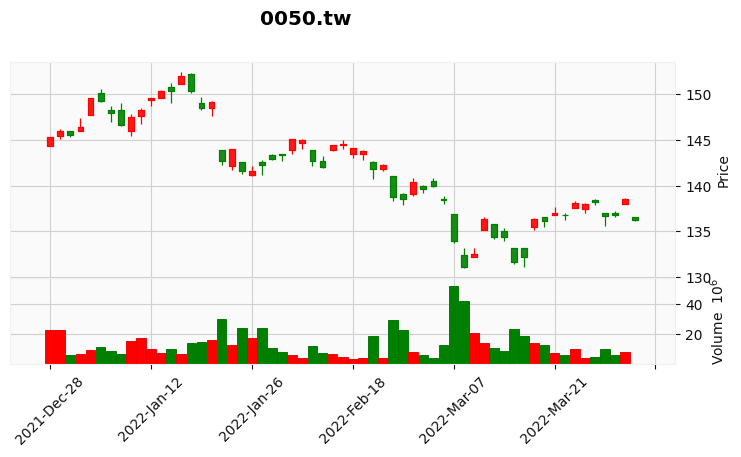

In [ ]:
#繪製K線圖
mc = mpf.make_marketcolors(up='r', down='g', inherit=True) #自訂圖表外觀，設定k線圖色彩
exterior  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc) #保存圖表外觀

#詳細設定可參考 [https://pypi.org/project/mplfinance/]
#volume 控制下方是否顯示價格
k_plot = mpf.plot(df2, style=exterior, type='candle', volume=True, figratio=(30,14), figscale=0.75, title='0050.tw',)

# Ta-Lib 實作

＊查看類別功能 [ http://mrjbq7.github.io/ta-lib/doc_index.html ]



```
#可 print(function_list) 查看所有功能
function_list= talib.get_function_groups()
# 查看功能類別
function_list.keys()
```



In [ ]:
#參數設定： timeperiod：天數參數，可自由設定天數，預設為14

_adx = talib.ADX(df.High, df.Low, df.Close, timeperiod = 7)

_rsi = talib.RSI(df.Close,  timeperiod = 7)

_dema = talib.DEMA(df.Close, timeperiod=30)

In [ ]:
# 平均趨向指數(ADX)
# ADX超過30代表匯價已進入趨勢。而低於30則表示匯價在區間內波動。當ADX超過30時，ADX的讀值越大，說明價格趨勢越明顯。
_adx

Date
2018-04-02          NaN
2018-04-03          NaN
2018-04-09          NaN
2018-04-10          NaN
2018-04-11          NaN
                ...    
2021-07-23    23.930631
2021-07-26    25.923251
2021-07-27    27.981423
2021-07-28    32.696474
2021-07-29    34.881715
Length: 810, dtype: float64

In [ ]:
# 相對強弱指數(RSI)
# 股價 平均漲幅 與 平均跌幅 所計算出來的數值，可看出股價觀測時間內股票價格強勢或弱勢的指標。
# RSI = (上升平均數/(上升平均數+下跌平均數))×100
_rsi 

Date
2018-04-02          NaN
2018-04-03          NaN
2018-04-09          NaN
2018-04-10          NaN
2018-04-11          NaN
                ...    
2021-07-23    43.052091
2021-07-26    34.833045
2021-07-27    34.512735
2021-07-28    23.618134
2021-07-29    44.866997
Length: 810, dtype: float64

In [ ]:
# 雙指數移動平均線(DEMA)
# DEMA ＝ 2 * N日EMA － N日EMA的EMA 
_dema 

Date
2018-04-02           NaN
2018-04-03           NaN
2018-04-09           NaN
2018-04-10           NaN
2018-04-11           NaN
                 ...    
2021-07-23    138.904710
2021-07-26    138.651695
2021-07-27    138.414866
2021-07-28    137.930754
2021-07-29    137.772730
Length: 810, dtype: float64

## 資料處理

In [ ]:
# axis = 0 代表 Down , axis = 1 代表 across
# inplace = True 代表直接從該 DataFrame 中進行操作 
df.drop(['Open', 'High', 'Low', 'Volume','Adj Close'], axis=1, inplace=True) 

In [ ]:
df

,Close
Date,
2018-04-02,82.250000
2018-04-03,81.500000
2018-04-09,82.199997
2018-04-10,82.500000
2018-04-11,82.849998
...,...
2021-07-23,137.649994
2021-07-26,136.449997
2021-07-27,136.399994


In [ ]:
#直接針對整個資料集進行比例切割，常用之訓練集與預測集比例為8:2
split_point = int(len(df)*0.8)
train = df.iloc[:split_point].copy()
test = df.iloc[split_point:].copy()

#也可以依照日期進行切割
'''
split_date = pd.Timestamp('2020-11-26') #台灣全國進入三級警戒
train = df.loc[:split_date]
test1 = df.loc[split_date:]
'''

"\nsplit_date = pd.Timestamp('2020-11-26') #台灣全國進入三級警戒\ntrain = df.loc[:split_date]\ntest1 = df.loc[split_date:]\n"

In [ ]:
#資料歸一化
scaler = MinMaxScaler(feature_range=(-1, 1))

#若資料非一維數據，需將資料做reshape的動作，調整成(資料長度,1) 

train_set= train.values.reshape(-1,1)
train_sc = scaler.fit_transform(train_set)

test_set= test.values.reshape(-1,1)
test_sc = scaler.fit_transform(test_set)


In [ ]:
predict_days = 1 
X_train = train_sc[:-predict_days]
y_train = train_sc[predict_days:]
X_test = test_sc[:-predict_days]
y_test = test_sc[predict_days:]

In [ ]:
#確認資料集的形狀，很重要 ！ 
#可告知別人訓練集與資料集的大小
X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(647, 1, 1) (647, 1) (161, 1, 1) (161, 1)


# 建立模型

模型fit可調整的參數：

epochs（迭代）：訓練次數 


batch_size（批次）：一次進入幾筆資料  


verbose（進度條模式） ：有0、1、2三種模式可選擇


callbacks  （回調函數） ：參考此網頁 [https://keras.io/zh/callbacks/]

In [ ]:
#建立LSTM模型
lstm_model = Sequential()

#LSTM ：神經元（units） 
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1],1)))

#遺忘層 ： 可調整 Dropout 遺忘率
lstm_model.add(Dropout(0.2))

#輸出層 ： 輸出資料的數量
lstm_model.add(Dense(1))

#loss : 損失函數
#optimizer : 優化器
#metrics : 評估指標
#其餘的函數設定可參考 [ https://www.tensorflow.org/api_docs/python/tf/keras/Model ]
lstm_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

#使用EarlyStopping避免浪費時間
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

history_lstm_model = lstm_model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2, shuffle=True, callbacks=[early_stop])


Epoch 1/20
647/647 - 7s - loss: 0.0361 - accuracy: 0.0015 - 7s/epoch - 11ms/step
Epoch 2/20
647/647 - 2s - loss: 0.0038 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 3/20
647/647 - 2s - loss: 0.0032 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 4/20
647/647 - 2s - loss: 0.0034 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 5/20
647/647 - 2s - loss: 0.0037 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 5: early stopping


# 模型訓練可視化

In [ ]:
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


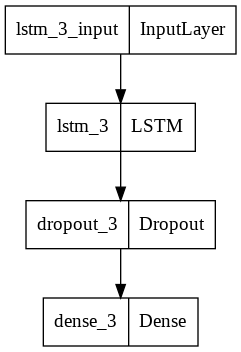

In [ ]:
plot_model(lstm_model, 'model.png')

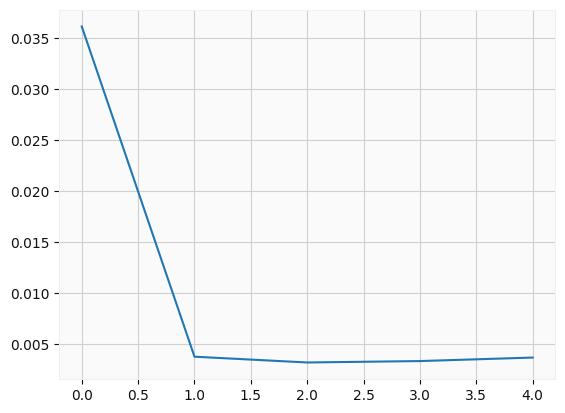

In [ ]:
plt.plot(history_lstm_model.history['loss'])

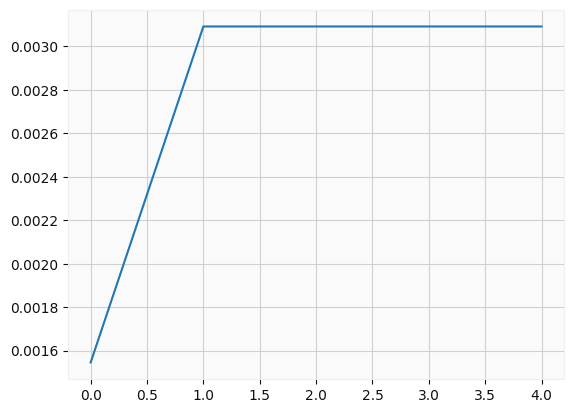

In [ ]:
plt.plot(history_lstm_model.history['accuracy'])

# 模型預測

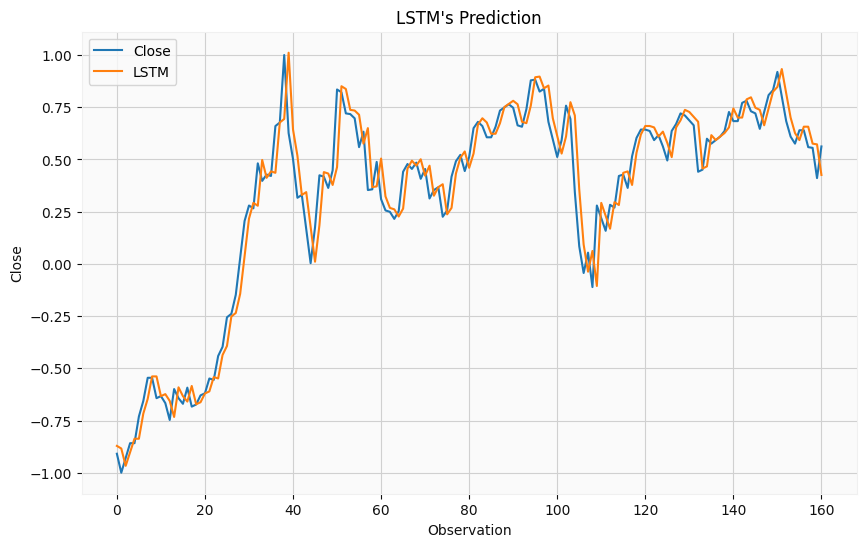

In [ ]:
y_pred_test_lstm = lstm_model.predict(X_test) #進行預測
plt.figure(figsize=(10, 6))
plt.plot(y_test[:,0], label='Close')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Close')
plt.legend()
plt.show();

In [ ]:
#將歸一化的數據還原
reduction_Lstm_pred = scaler.inverse_transform(y_pred_test_lstm)
reduction_test = df.iloc[split_point:].copy()
reduction_y_test = reduction_test[predict_days:]

In [ ]:
#模型評價
print("Mean Absolute Error:", mean_absolute_error(reduction_y_test, reduction_Lstm_pred))
print('Mean Squared Error:', mean_squared_error(reduction_y_test, reduction_Lstm_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(reduction_y_test, reduction_Lstm_pred)))
print("Coefficient of Determination:", r2_score(reduction_y_test, reduction_Lstm_pred))

Mean Absolute Error: 1.2338542108950408
Mean Squared Error: 2.91080024759343
Root Mean Squared Error: 1.7061067515233124
Coefficient of Determination: 0.9436798580477122
